In [67]:
import matplotlib
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats (28x28)

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)
print("autoencoder model created")

# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



autoencoder model created


In [68]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# plt.imshow(x_train[2001], cmap='gray')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                nb_epoch=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s - loss: 0.2756 - val_loss: 0.1876
Epoch 2/5
60000/60000 [==============================] - 11s - loss: 0.1695 - val_loss: 0.1531
Epoch 3/5
60000/60000 [==============================] - 11s - loss: 0.1440 - val_loss: 0.1338
Epoch 4/5
60000/60000 [==============================] - 11s - loss: 0.1285 - val_loss: 0.1214
Epoch 5/5
60000/60000 [==============================] - 11s - loss: 0.1183 - val_loss: 0.1127


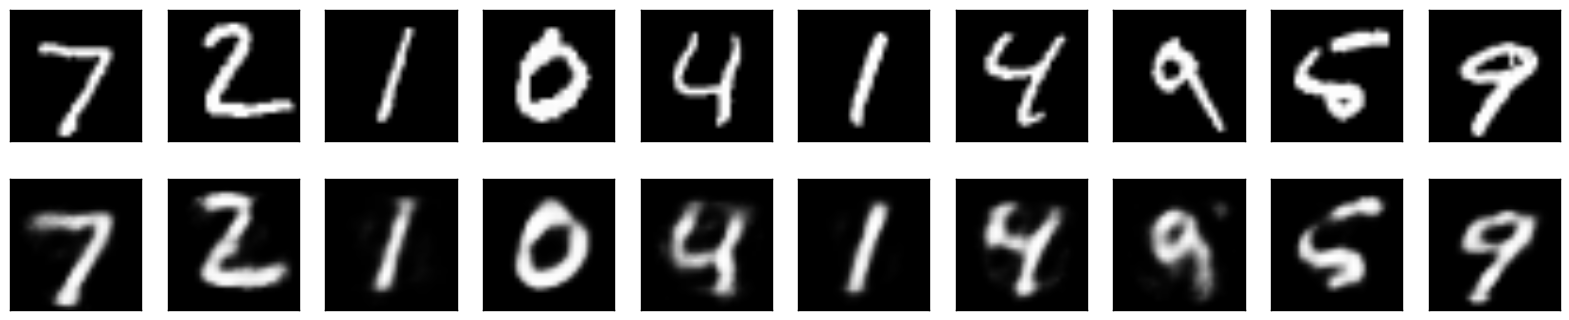

In [69]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()